In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing API to connect to NFL data sources like nflfastR, nfldata, dynastyprocess, and Draft Scout.
import nfl_data_py as nfl 

In [112]:
# bringing back in data frames ff_all and ff_collective

# ff_all = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv", index_col = 0,
                   # low_memory = False)
ff_collective = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv", low_memory = False,
                            index_col = 0)

In [113]:
# making all cols lower case

# ff_all.columns = map(str.lower, ff_all.columns)
ff_collective.columns = map(str.lower, ff_collective.columns)


In [114]:
ff_collective.loc[ff_collective.season == 2023]

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season
3477,NaN,James Conner,RB,NaN,NaN,NaN,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3626.0,1873.0,5499.0,340.0,2023.0
3478,NaN,Marquise Brown,WR,NaN,NaN,NaN,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3626.0,1873.0,5499.0,340.0,2023.0
3479,NaN,Rondale Moore,WR,NaN,NaN,NaN,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3626.0,1873.0,5499.0,340.0,2023.0
3480,NaN,Kyler Murray,QB,NaN,NaN,NaN,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3626.0,1873.0,5499.0,340.0,2023.0
3481,NaN,Zach Ertz,TE,NaN,NaN,NaN,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# FF Collective initial EDA, further cleaning, feature engineering

In [115]:
# take a look at sample of the data, make sure everything looks 

pd.set_option('display.max_columns', None)
ff_collective.sample(7)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season
3236,NE,Scotty Washington,TE,00-0035769,77.0,225.0,2.0,NWE,NaN,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2022,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New England Patriots,364.0,288.0,5348.0,3536.0,1812.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NE,NaN,NaN,NaN,NaN,NaN,3857.0,2151.0,6008.0,462.0,2022.0
2759,BUF,Dawson Knox,TE,00-0035689,76.0,254.0,3.0,BUF,TE,26.0,15.0,15.0,65.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,517.0,6.0,88.0,0.0,0.0,0.0,124.0,Dawson Knox,2022,0.0,NaN,10.77,6.0,NaN,NaN,135.7,138.7,111.7,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dawson Knox,NaN,NaN,NaN,8.739509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-0035689,5.598786,3.867804,18.171170,9.875000,13.625000,70.331960,112.750000,1.125000,4.793932,4.473614,0.320319,Buffalo Bills,455.0,367.0,6361.0,4129.0,2232.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,BUF,00-0035689,Dawson Knox,1.0,2.0,3.0,4284.0,2209.0,6493.0,483.0,2022.0
2349,MIA,Jordan Scarlett,RB,00-0035275,71.0,210.0,2.0,MIA,NaN,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miami Dolphins,341.0,325.0,5219.0,3651.0,1568.0,26.0,-11.96,-16.12,373.0,5738.0,3871.0,1867.0,26.0,1.58,8.0,0.0,9.0,9.0,NaN,MIA,NaN,NaN,NaN,NaN,NaN,3736.0,1688.0,5424.0,404.0,2021.0
3470,WAS,Jahan Dotson,WR,00-0037741,71.0,182.0,0.0,WAS,WR,22.0,12.0,10.0,61.0,35.0,0.0,0.0,0.0,-7.0,0.0,2.0,523.0,7.0,96.0,0.0,0.0,0.0,NaN,NaN,2022,0.0,-3.5,14.94,7.0,1.0,NaN,130.6,133.6,113.1,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jahan Dotson,NaN,NaN,NaN,14.722894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-0037741,5.920037,2.646875,30.975767,7.750000,13.750000,56.765385,113.000000,1.625000,3.302869,2.884817,0.418052,Washington Commanders,321.0,339.0,5615.0,3472

In [116]:
ff_collective.describe()

,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season
count,3294.000000,3468.000000,3133.000000,2436.000000,2436.000000,2436.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2243.000000,2435.000000,2435.000000,2435.000000,626.000000,3661.000000,602.000000,329.000000,458.000000,602.000000,51.000000,24.00000,544.000000,543.000000,543.000000,69.000000,602.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,247.000000,247.000000,1103.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,855.000000,856.000000,856.000000,856.000000,856.000000,856.000000,855.000000,856.000000,855.000000,855.000000,855.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,779.00000,1687.000000,1687.000000,1687.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,73.425622,217.430219,3.211299,26.158867,10.767241,5.024220,27.763860,18.651745,210.641068,1.325667,29.450103,98.114579,0.785626,22.394661,206.659138,1.292813,64.570860,0.671458,0.936756,0.431622,87.404153,2020.550396,19.084718,4.236657,10.315349,1.983389,1.078431,1.62500,79.849081,83.657274,70.541252,46.898551,90.054817,2.085542e+06,58.044966,12.008725,511.120805,55.426174,43.079866,6.914094,0.0,58.234899,-11.216779,2.759172,5.685378,9.409767,-2.224093,16.162191,39.458219,-1.012750,50.250024,350.866945,2.069315,1.213906,85.788282,31.991887,63.136304,64.722779,-1.586475,21.003781,47.296812,4.473698,22.708762,2.787491,23.838955,103.006074,97.294735,3.982169,4.239487,0.098263,0.382179,0.783523,6.039030,3.028439,23.950273,7.500049,11.728006,63.270577,90.430389,0.570206,4.456373,3.983055,0.473743,380.767645,337.213304,5720.485946,3784.828232,1935.657714,21.816365,69.099195,-68.926261,382.377631,5722.068097,3833.684276,1888.383822,21.878250,0.939154,8.148989,0.070986,8.093686,8.129179,16.94095,0.749852,1.049793,1.799644,3807.476210,1917.935603,5725.411813,385.547170,2021.136177
std,2.881150,23.556890,3.165110,3.305494,5.323885,5.567269,36.106362,24.422859,805.679578,5.429489,110.529005,237.143759,2.109580,52.097208,299.121100,2.217268,77.138975,2.520513,1.975430,0.968138,55.546921,1.236948,70.662690,3.914599,5.394760,2.86

We should create some type of cutoff for amount of games played, and keep track of what our limitations will be


Text(0.5, 1.0, 'Distribution of games started')

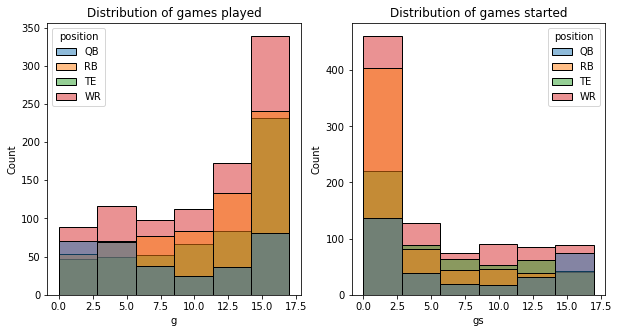

In [117]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective, x = 'g', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of games played')

sns.histplot(data = ff_collective, x = 'gs', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')


In [118]:
ff_collective['position'].value_counts()

WR    1445
RB     935
TE     765
QB     508
Name: position, dtype: int64

In [119]:
ff_collective[['g', 'gs']].quantile([.1, .2, .25])

,g,gs
0.10,2.0,0.0
0.20,5.0,0.0
0.25,6.0,0.0


It would makes sense to have a games played cutoff for all positons (20th percentile is 5 games played; is a good cut off to keep the top 80% of the league). many of the RBs, WRs and TEs play in a lot of games but don't start them -- the nature of the sport and the amount of players at each position.

Only for QBs should there be a cutoff for games started. 

Other ways to clean up data? 

In [120]:
### if players didn't record any FF stats, some of these columns would be null
# let's check

ff_collective[['tm', 'g', 'gs']].isna().sum()

tm    1041
g     1225
gs    1225
dtype: int64

In [121]:
# see a sample of data with nulls

ff_collective[ff_collective[['tm', 'g', 'gs']].isnull().any(axis = 1)].sample(10)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season
781,TB,Bryant Mitchell,WR,00-0034901,74.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tampa Bay Buccaneers,458.0,353.0,6366.0,4845.0,1521.0,41.0,37.00,20.23,449.0,5503.0,4322.0,1181.0,28.0,-42.27,9.0,0.0,7.0,7.0,NaN,TB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1394,SF,Chase Harrell,TE,00-0035805,76.0,249.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers,376.0,350.0,5922.0,4033.0,1889.0,31.0,55.70,-16.82,390.0,5030.0,3327.0,1703.0,20.0,-58.14,10.0,0.0,6.0,6.0,NaN,SF,NaN,NaN,NaN,NaN,NaN,3792.0,2305.0,6097.0,479.0,2020.0
1180,CLE,Kyle Markway,TE,00-0035817,76.0,250.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland Browns,408.0,355.0,5913.0,3539.0,2374.0,16.0,140.35,-127.09,419.0,5735.0,3962.0,1773.0,21.0,-9.72,5.0,0.0,11.0,11.0,NaN,CLE,NaN,NaN,NaN,NaN,NaN,3554.0,1901.0,5455.0,335.0,2020.0
605,MIA,Terry Wright,WR,00-0035097,70.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miami Dolphins,306.0,315.0,4960.0,3804.0,1156.0,26.0,-28.85,-170.02,494.0,6364.0,4198.0,2166.0,16.0,12.50,11.0,0.0,5.0,5.0,NaN,MIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,NE,Garrett Gilbert,QB,00-0031395,76.0,230.0,8.0,NaN,NaN,NaN,NaN,

We will get rid of nulls here, as well

In [122]:
## checking fantasy data

ff_collective[['player_name', 'fantasypoints', 'season']].sample(5)

,player_name,fantasypoints,season
3231,Pierre Strong,20.0,2022
2135,Kurt Benkert,NaN,2021
3205,James O'Shaughnessy,NaN,2022
1649,Ross Travis,NaN,2020
898,Tevin Coleman,135.4,2019


Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

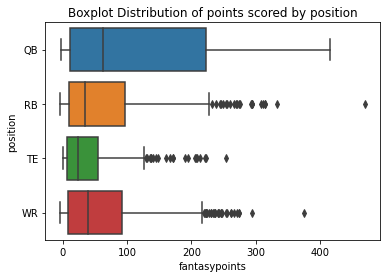

In [123]:
# let's visualize some data within this

ax = sns.boxplot(data = ff_collective, x = 'fantasypoints', y = 'position')

ax.set_title('Boxplot Distribution of points scored by position')


Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

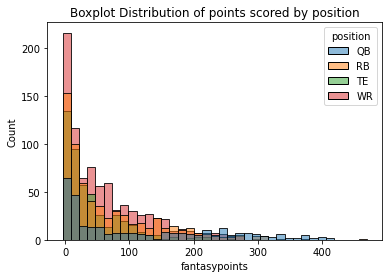

In [124]:
# let's visualize some data within this

ax = sns.histplot(data = ff_collective, x = 'fantasypoints', hue = 'position')

ax.set_title('Boxplot Distribution of points scored by position')

So, the bottom 10% of the league scores 2 or less points a season. The median is 34.6. let's see how this looks after filtering out for games played and other nulls 

The median here has increased, as predicted. We'll use this median as the cutoff for fantasy points in a season in this dataset (46 points).

Thus far, we've excluded players that didn't have any fantasy stats ('g', 'gs', 'tm' all null), players with >= 5 games played (20th percentile), and >= median of fantasy points for all players, as we want relevant players.

At this point, other cutoffs should be made at a position by position basis. 

### Further cleaning and feature engineering

what columns can we simply get rid of (Redundant info, but one has nulls, or one with nulls that we will derive later on, like avg_rush_yards or yards per target)

rush_yards, rush_attempts, avg_rush_yards, rush_touchdowns, targets, receptions, yards, rec_touchdowns, y/a, y/r, completions, completion_percentage, 2pm, 2pp, posrank, totaltds_22

In [125]:
# cols to drop

cols_drop = ['rush_yards', 'rush_attempts', 'avg_rush_yards', 
             'rush_touchdowns', 'targets', 'receptions', 'yards', 
             'rec_touchdowns', 'y/a', 'y/r', 'completions', 'completion_percentage',
            '2pm', '2pp', 'posrank', 'totaltds_22']

ff_collective_sm = ff_collective.drop(cols_drop, axis = 1)

In [126]:
ff_collective_sm[['team']]

,team,team
0,ARI,Arizona Cardinals
1,ARI,Arizona Cardinals
2,ARI,Arizona Cardinals
3,ARI,Arizona Cardinals
4,ARI,Arizona Cardinals
...,...,...
3656,NaN,Washington Commanders
3657,NaN,Washington Commanders
3658,NaN,Washington Commanders
3659,NaN,Washington Commanders


In [127]:
ff_collective_sm.tm.value_counts()

2TM    92
NYJ    91
WAS    89
NYG    88
NOR    86
TEN    85
DEN    83
LAC    83
DET    82
CHI    82
SFO    80
MIA    79
CLE    78
PHI    78
ATL    78
HOU    77
TAM    77
SEA    76
BAL    76
ARI    76
PIT    75
CIN    75
BUF    75
CAR    74
NWE    73
LAR    73
JAX    73
DAL    73
MIN    72
IND    72
GNB    69
KAN    67
LVR    49
OAK    16
KC      8
3TM     7
SF      7
NO      6
LV      6
GB      5
TB      5
NE      4
Name: tm, dtype: int64

In [128]:
# need to change some values to others

ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'KC', 'KAN', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'SF', 'SFO', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'NO', 'NOR', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'LV', 'LVR', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'GB', 'GNB', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'TB', 'TAM', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'NE', 'NWE', ff_collective_sm['tm'])

In [129]:
# 2022 teams have limited data for team wins. need to add that

wins_22 = {'ARI': 4, 'ATL': 7, 'BAL': 10, 'BUF': 13, 'CAR': 7, 'CHI': 3, 'CIN': 12, 'CLE': 7,
           'DAL': 12, 'DEN': 5, 'DET': 9, 'GNB': 8, 'HOU': 3, 'IND': 4, 'JAX': 9, 'LVR': 6,
           'LAC': 10, 'LAR': 5, 'MIA': 9, 'MIN': 13, 'NWE': 8, 'NOR': 7, 'NYG': 9, 'NYJ': 7,
           'PHI': 14, 'PIT': 9, 'SFO': 13, 'SEA': 9, 'TAM': 8, 'TEN': 7, 'WAS': 8}

ff_collective_sm.loc[ff_collective_sm['season'] == 2022, 'team_wins'] = ff_collective_sm['tm'].map(wins_22)

In [130]:
ff_collective_sm.loc[ff_collective_sm['season'] == 2022]['team_wins']

2668    4.0
2669    4.0
2670    4.0
2671    4.0
2672    NaN
       ... 
3469    8.0
3470    8.0
3471    NaN
3472    9.0
3476    NaN
Name: team_wins, Length: 806, dtype: float64

In [131]:
# running similar code as above to create new columns

# percentage of games started
ff_collective_sm['pct_gs'] = ff_collective_sm['gs'] / ff_collective_sm['g'] 

ff_collective_sm['avg_per_rush'] = ff_collective_sm['rushingyds'] / ff_collective_sm['rushingatt']

ff_collective_sm['avg_per_catch'] = ff_collective_sm['receivingyds'] / ff_collective_sm['rec']

ff_collective_sm['avg_per_tgt'] = ff_collective_sm['receivingyds'] / ff_collective_sm['tgt']

ff_collective_sm['ttl_touch'] = ff_collective_sm['rushingatt'] + ff_collective_sm['rec']

ff_collective_sm['ttl_opp'] = ff_collective_sm['rushingatt'] + ff_collective_sm['tgt'] + ff_collective_sm['passingatt']

ff_collective_sm['ttl_turnover'] = ff_collective_sm['int'] + ff_collective_sm['fumbleslost']

ff_collective_sm['ttl_opp_per_game'] = ff_collective_sm['ttl_opp'] / ff_collective_sm['g']

ff_collective_sm['yds_per_opp'] = (ff_collective_sm['receivingyds'] + ff_collective_sm['rushingyds'] + ff_collective_sm['passingyds']) / ff_collective_sm['ttl_opp']

ff_collective_sm['td_per_opp'] = (ff_collective_sm['receivingtd'] + ff_collective_sm['rushingtd'] + ff_collective_sm['passingtd']) / ff_collective_sm['ttl_opp']

ff_collective_sm['turnover_per_opp'] = ff_collective_sm['ttl_turnover'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_opp'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_gm'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['g']

# If rookie year
ff_collective_sm['rookie'] = np.where(ff_collective_sm['years_exp'] == 0, 1, 0)

ff_collective_sm['scrimyds'] = ff_collective_sm['rushingyds'] + ff_collective_sm['receivingyds']
ff_collective_sm['non_pass_tds'] = ff_collective_sm['rushingtd']  + ff_collective_sm['receivingtd']

# getting standard fantasy points
ff_collective_sm['std_fp'] = ff_collective_sm['passingyds'] * 0.04 + ff_collective_sm['scrimyds'] * 0.1 + \
                          ff_collective_sm['passingtd'] * 4 + ff_collective_sm['non_pass_tds'] * 6 + \
                          (ff_collective_sm['ttl_turnover'] * -2)

# creating another with 5 pt passing tds
ff_collective_sm['std_fp_5ptd'] = ff_collective_sm['std_fp'] + ff_collective_sm['passingtd']


ff_collective_sm['hppr_fp'] = ff_collective_sm['std_fp'] + (0.5 * ff_collective_sm['rec'])
ff_collective_sm['hppr_fp_5ptd'] = ff_collective_sm['std_fp_5ptd'] + (0.5 * ff_collective_sm['rec'])

# writing short function for te_premium points
def te_prem(row):
    if row['position'] == 'TE':
        return row['std_fp'] + (1 * row['rec'])
    else:
        return row['std_fp'] + (0.5 * row['rec'])
                                
ff_collective_sm['te_prem_pts'] = ff_collective_sm.apply(lambda row: te_prem(row), axis=1)
ff_collective_sm['te_prem_pts_p5td'] = ff_collective_sm['te_prem_pts']  + ff_collective_sm['passingtd']

ff_collective_sm['hppr_pts_pg_5ptd'] = ff_collective_sm['hppr_fp_5ptd'] / ff_collective_sm['g']

ff_collective_sm['te_prem_pts_pg_5ptd'] = ff_collective_sm['te_prem_pts_p5td'] / ff_collective_sm['g']

ff_collective_sm.sample(5)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd
2188,IND,Marlon Mack,RB,00-0033951,72.0,210.0,4.0,IND,RB,25.0,6.0,0.0,5.0,2.0,0.0,0.0,0.0,101.0,0.0,28.0,8.0,0.0,11.0,0.0,0.0,0.0,183.0,Marlon Mack,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marlon Mack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.181818,70.0,3.123571,31.240064,-9.240064,-0.924006,0.2,00-0033951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indianapolis Colts,451.0,354.0,5901.0,3361.0,2540.0,19.0,127.06,-49.31,365.0,5834.0,3980.0,1854.0,33.0,9.49,8.0,0.0,9.0,9.0,NaN,IND,NaN,NaN,NaN,NaN,NaN,4053.0,1996.0,6049.0,451.0,2021.0,0.0000,3.607143,4.0,1.600000,30.0,33.0,0.0,5.5000,3.303030,0.000000,0.0,0.333333,1.833333,0,109.0,0.0,10.9,10.9,11.9,11.9,11.9,11.9,1.983333,1.983333
337,GB,Marcedes Lewis,TE,00-0024243,78.0,267.0,13.0,GNB,TE,35.0,16.0,11.0,19.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,1.0,36.6,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green Bay Packers,376.0,320.0,5528.0,3733.0,1795.0,13.0,89.30,-26.09,313.0,5642.0,3721.0,1921.0,25.0,-2.66,3.0,0.0,13.0,13.0,NaN,GB,00-0024243,Marcedes Lewis,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.6875,NaN,10.4,8.210526,15.0,19.0,0.0,1.1875,8.210526,0.052632,0.0,1.926316,2.287500,0,156.0,1.0,21.6,21.6,29.1,29.1,36.6,36.6,1.818750,2.287500
1704,PHI,Joshua Perkins,TE,00-0032599,75.0,223.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philadelphia Eagles,334.0,336.0,5354.0,3327.0,2027.0,29.0,-13.65,-71.06,418.0,5810.0,3798.0,2012.0,19.0,-19.32,11.0,1.0,4.0,4.5,NaN,PHI,NaN,NaN,NaN,NaN,NaN,3833.0,1939.0,5772.0,385.0,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3609,NaN,Breece Hall,RB,NaN,NaN,NaN,NaN,NYJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [132]:
# fantasypoints are ppr points with standard qb scoring (4 pts per td pass)

ff_collective_sm[['position', 'rec', 'passingtd', 'fantasypoints', 'std_fp', 'hppr_fp', 'te_prem_pts']].sample(5)

,position,rec,passingtd,fantasypoints,std_fp,hppr_fp,te_prem_pts
1981,RB,42.0,0.0,153.0,153.0,174.0,174.0
1325,RB,3.0,0.0,6.0,5.6,7.1,7.1
1135,WR,NaN,NaN,NaN,NaN,NaN,NaN
214,WR,74.0,0.0,201.3,127.3,164.3,164.3
1276,RB,0.0,0.0,1.0,0.8,0.8,0.8


# Cleaning ff_collective!

From iterations through these notebooks, there continues to be some data quality issues. Really, due to the nature of the data, there will be nulls from when players either retire or come into the league, or get injured too. 


In [133]:
ff_collective_sm.describe()

,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,season,cmp,ppr,dkpt,fdpt,vbd,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd
count,3294.000000,3468.000000,3133.000000,2436.000000,2436.000000,2436.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2243.000000,2435.000000,2435.000000,2435.000000,626.000000,3661.000000,602.000000,544.000000,543.000000,543.000000,69.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,247.000000,247.000000,1103.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,855.000000,856.000000,856.000000,856.000000,855.000000,855.000000,855.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2979.000000,779.00000,1687.000000,1687.000000,1687.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2435.000000,1337.000000,1883.000000,1945.000000,2435.000000,2435.000000,2435.000000,2435.000000,2264.000000,2264.000000,2269.000000,2199.000000,2243.000000,3661.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,73.425622,217.430219,3.211299,26.158867,10.767241,5.024220,27.763860,18.651745,210.641068,1.325667,29.450103,98.114579,0.785626,22.394661,206.659138,1.292813,64.570860,0.671458,0.936756,0.431622,87.404153,2020.550396,19.084718,79.849081,83.657274,70.541252,46.898551,2.085542e+06,58.044966,12.008725,511.120805,55.426174,43.079866,6.914094,0.0,58.234899,-11.216779,2.759172,5.685378,9.409767,-2.224093,16.162191,39.458219,-1.012750,50.250024,350.866945,2.069315,1.213906,85.788282,64.722779,-1.586475,21.003781,47.296812,4.473698,22.708762,2.787491,97.294735,3.982169,0.098263,0.382179,6.039030,3.028439,23.950273,63.270577,4.456373,3.983055,0.473743,380.767645,337.213304,5720.485946,3784.828232,1935.657714,21.816365,69.099195,-68.926261,382.377631,5722.068097,3833.684276,1888.383822,21.878250,0.939154,8.148989,0.070986,8.093686,8.128231,16.94095,0.749852,1.049793,1.799644,3807.476210,1917.935603,5725.411813,385.547170,2021.136177,0.400164,inf,NaN,NaN,41.046407,79.608624,1.103080,6.864759,6.251848,0.042336,inf,NaN,5.146522,0.162797,304.773717,2.078439,54.470160,55.795828,63.796033,65.12170

In [140]:
ff_collective_sm.isna().sum()

team                    192
player_name               8
position                  8
player_id_x             197
height                  367
                       ... 
hppr_fp_5ptd           1226
te_prem_pts            1226
te_prem_pts_p5td       1226
hppr_pts_pg_5ptd       1226
te_prem_pts_pg_5ptd    1226
Length: 135, dtype: int64

In [145]:
scoring_by_year = ['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

null_cols = ['te_prem_pts_p5td','tm', 'pos','pts_scored', 'age', 'passy_last_yr_tm_stat']

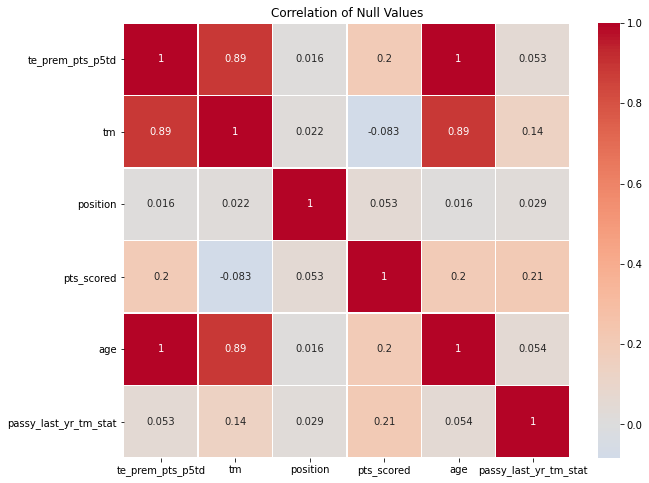

In [144]:
# let's see if there are any large correlations between nulls

null_corr = ff_collective_sm[null_cols].isna().corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(null_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation of Null Values")
plt.show()


In [146]:
# based on the data, people who have team be null (and many subsequent rows) 
# from fantasy data definitely are not relevants 

ff_collective_sm.dropna(subset = ['tm'])

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd
0,ARI,Brett Hundley,QB,00-0031589,75.0,226.0,4.0,ARI,QB,26.0,3.0,0.0,0.0,0.0,49.0,0.0,11.0,41.0,0.0,7.0,0.0,0.0,6.06,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.857143,NaN,NaN,7.0,18.0,0.0,6.000000,5.000000,0.000000,0.000000,0.336667,2.020000,0,41.0,0.0,6.06,6.06,6.06,6.06,6.06,6.06,2.020000,2.020000
1,ARI,Kyler Murray,QB,00-0035228,70.0,207.0,0.0,ARI,QB,22.0,16.0,16.0,0.0,0.0,3722.0,20.0,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0,114.0,Kyler Murray,2019,NaN,NaN,NaN,NaN,NaN,ARI,3917315.0,57.7,16.2,709.0,71.6,37.3,13.4,0.0,58.0,-17.8,Kyler Murray,Kyler Murray,00-0035228,2.733681,4.914236,6.850385,-1.936149,13.732432,38.64734,-2.111357,63.764706,437.882353,2.352941,1.411765,88.714455,66.836301,-1.817664,20.623331,45.849949,00-0035228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,NaN,ARI,00-0035228,Kyler Murray,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.000000,5.849462,NaN,NaN,93.0,635.0,14.0,39.687500,6.718110,0.037795,0.022047,0.439811,17.455000,1,544.0,4.0,279.28,299.28,279.28,299.28,279.28,299.28,18.705000,18.705000
3,ARI,Alfred Morris,RB,00-0029141,70.0,222.0,7.0,ARI,RB,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.40,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,NaN,ARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,NaN,NaN,1.0,1.0,0.0,1.000000,4.000000,0.000000,0.000000,0.400000,0.400000,0,4.0,0.0,0.40,0.40,0.40,0.40,0.40,0.40,0.400000,0.400000
4,ARI,David Johnson,RB,00-0032187,73.0,224.0,4.0,ARI,RB,28.0,13.0,9.0,47.0,36.0,0.0,0.0,0.0,3

In [147]:
ff_collective_sm.isna().sum()

team                    192
player_name               8
position                  8
player_id_x             197
height                  367
                       ... 
hppr_fp_5ptd           1226
te_prem_pts            1226
te_prem_pts_p5td       1226
hppr_pts_pg_5ptd       1226
te_prem_pts_pg_5ptd    1226
Length: 135, dtype: int64

In [148]:
# there are way less nulls now!
# let's check describe again

ff_collective_sm.describe()

,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,season,cmp,ppr,dkpt,fdpt,vbd,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd
count,3294.000000,3468.000000,3133.000000,2436.000000,2436.000000,2436.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2243.000000,2435.000000,2435.000000,2435.000000,626.000000,3661.000000,602.000000,544.000000,543.000000,543.000000,69.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,247.000000,247.000000,1103.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,855.000000,856.000000,856.000000,856.000000,855.000000,855.000000,855.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2979.000000,779.00000,1687.000000,1687.000000,1687.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2435.000000,1337.000000,1883.000000,1945.000000,2435.000000,2435.000000,2435.000000,2435.000000,2264.000000,2264.000000,2269.000000,2199.000000,2243.000000,3661.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,73.425622,217.430219,3.211299,26.158867,10.767241,5.024220,27.763860,18.651745,210.641068,1.325667,29.450103,98.114579,0.785626,22.394661,206.659138,1.292813,64.570860,0.671458,0.936756,0.431622,87.404153,2020.550396,19.084718,79.849081,83.657274,70.541252,46.898551,2.085542e+06,58.044966,12.008725,511.120805,55.426174,43.079866,6.914094,0.0,58.234899,-11.216779,2.759172,5.685378,9.409767,-2.224093,16.162191,39.458219,-1.012750,50.250024,350.866945,2.069315,1.213906,85.788282,64.722779,-1.586475,21.003781,47.296812,4.473698,22.708762,2.787491,97.294735,3.982169,0.098263,0.382179,6.039030,3.028439,23.950273,63.270577,4.456373,3.983055,0.473743,380.767645,337.213304,5720.485946,3784.828232,1935.657714,21.816365,69.099195,-68.926261,382.377631,5722.068097,3833.684276,1888.383822,21.878250,0.939154,8.148989,0.070986,8.093686,8.128231,16.94095,0.749852,1.049793,1.799644,3807.476210,1917.935603,5725.411813,385.547170,2021.136177,0.400164,inf,NaN,NaN,41.046407,79.608624,1.103080,6.864759,6.251848,0.042336,inf,NaN,5.146522,0.162797,304.773717,2.078439,54.470160,55.795828,63.796033,65.12170

Nothing seems out of the ordinary here. More nulls will likely decrease as we work with position specific data

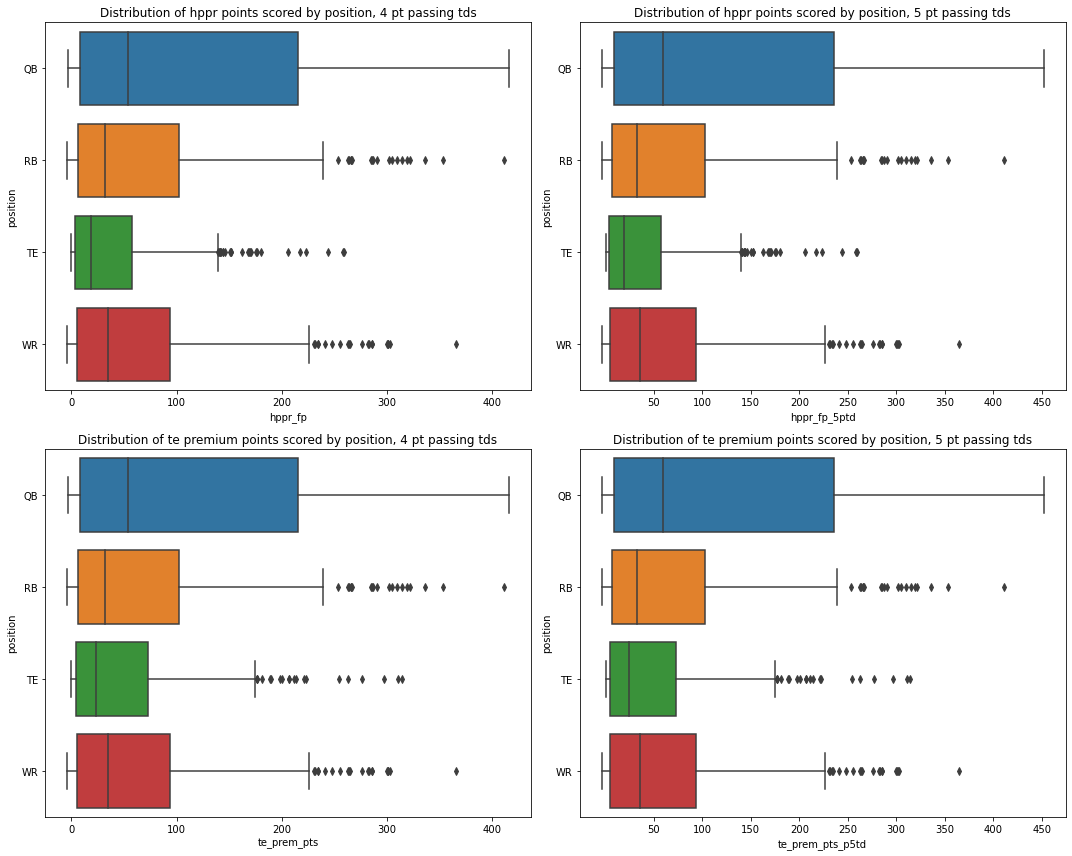

In [149]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Distribution of te premium points per game scored by position, 5 pt passing tds')

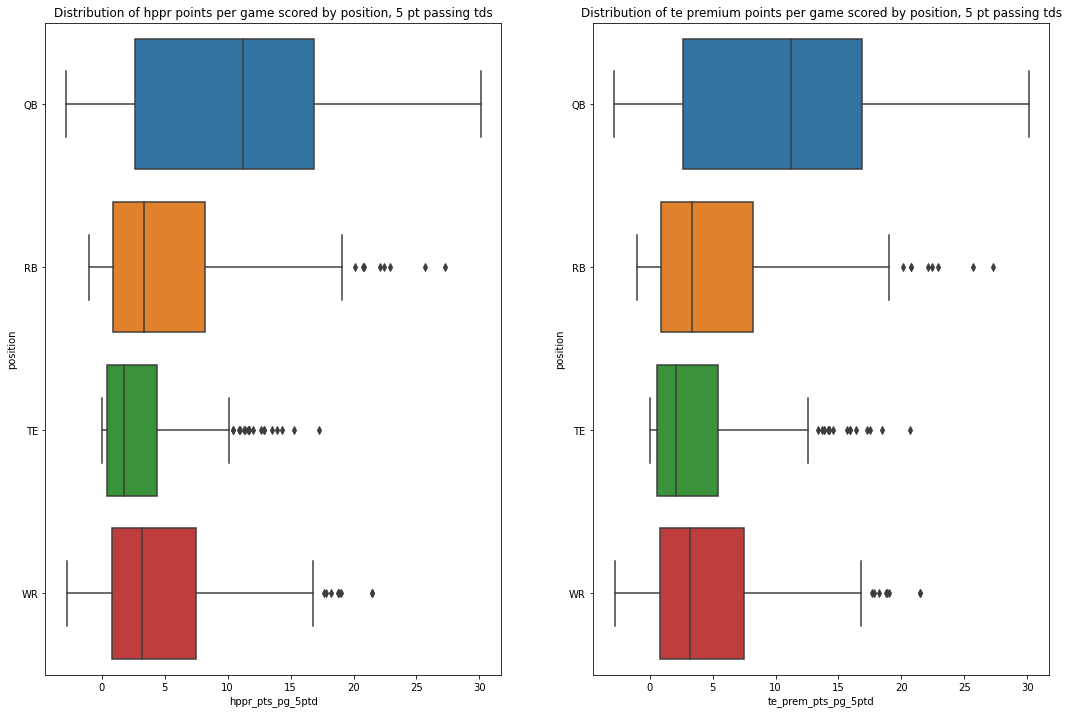

In [150]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_pts_pg_5ptd', ax = axes[0], y = 'position')
axes[0].set_title('Distribution of hppr points per game scored by position, 5 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_pg_5ptd', ax = axes[1], y = 'position')
axes[1].set_title('Distribution of te premium points per game scored by position, 5 pt passing tds')


Text(0.5, 1.0, 'Distribution of games started')

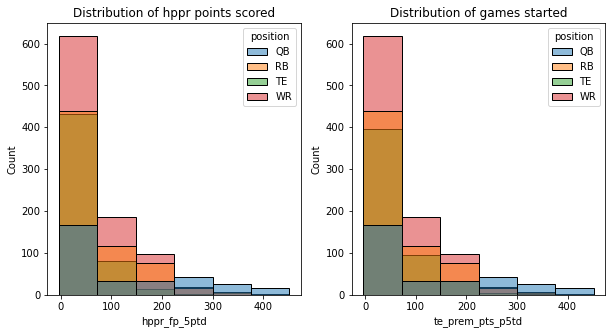

In [151]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of hppr points scored')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')

### ranking each in the season
Can we take the top 12 - 36 at each position?

In [152]:
# first, we'll sort these by position, season, and pts scored

ff_sorted = ff_collective_sm.sort_values(['position', 'season', 'hppr_fp_5ptd'], ascending = [True, True, False])

ff_sorted.head()

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd
58,BAL,Lamar Jackson,QB,00-0034796,74.0,212.0,1.0,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0,98.0,Lamar Jackson,2019,NaN,NaN,NaN,NaN,NaN,BAL,3916387.0,83.0,66.7,613.0,103.7,55.0,39.1,0.0,82.3,-7.4,Lamar Jackson,Lamar Jackson,00-0034796,2.943613,6.721439,8.814669,-2.093231,14.902159,38.032465,0.242468,50.125000,390.875000,4.500000,0.750000,108.768952,65.024081,2.274603,20.755909,47.606387,00-0034796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore Ravens,531.0,386.0,6521.0,3225.0,3296.0,15.0,244.10,32.06,282.0,4809.0,3315.0,1494.0,25.0,-15.42,2.0,0.0,14.0,14.0,NaN,BAL,00-0034796,Lamar Jackson,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,6.852273,NaN,NaN,176.0,577.0,8.0,38.466667,7.509532,0.074523,0.013865,0.720416,27.712000,0,1206.0,7.0,415.68,451.68,415.68,451.68,415.68,451.68,30.112000,30.112000
228,DAL,Dak Prescott,QB,00-0033077,74.0,238.0,3.0,DAL,QB,26.0,16.0,16.0,0.0,0.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,0.0,335.78,11.0,6.0,2.0,131.0,Dak Prescott,2019,NaN,NaN,NaN,NaN,NaN,DAL,2577417.0,71.9,48.1,690.0,93.1,70.7,10.0,0.0,72.8,-9.7,Dak Prescott,Dak Prescott,00-0033077,2.863889,7.383088,9.074466,-1.691378,17.214539,41.775767,0.210847,70.117647,576.705882,3.529412,1.294118,100.884018,63.199449,2.774790,21.938140,52.216855,00-0033077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,434.0,379.0,6904.0,4751.0,2153.0,18.0,210.77,-31.81,321.0,5232.0,3576.0,1656.0,17.0,-65.31,8.0,0.0,8.0,8.0,NaN,DAL,00-0033077,Dak Prescott,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,5.326923,NaN,NaN,52.0,648.0,13.0,40.500000,7.992284,0.050926,0.020062,0.518179,20.986250,0,277.0,3.0,335.78,365.78,335.78,365.78,335.78,365.78,22.861250,22.861250
859,SEA,Russell Wilson,QB,00-0029263,71.0,215.0,7.0,SEA,QB,31.0,16.0,16.0,0.0,0.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,0.0,326.60,5.0,8.0,2.0,93.0,Russell Wilson,2019,NaN,NaN,NaN,NaN,NaN,SEA,14881.0,71.5,43.0,674.0,90.9,58.3,10.6,0.0,71.2,-20.6,Russell Wilson,Russell Wilson,00-0029263,2.857214,6.919418,9.558971,-2.639553,19.070277,43.704954,0.181699,60.470588,481.411765,3.647059,0.588235,107.783697,61.297215,5.329405,22.970712,48.710589,00-0029263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,405.0,341.0,5991.0,3791.0,2200.0,20.0,6

In [153]:
# grouping by posiiton and season
# getting rank for these

ff_grouped = ff_sorted.groupby(['position', 'season'])

# adding rank column to collective
ff_collective_sm['season_position_rank'] = ff_grouped['hppr_fp_5ptd'].rank(ascending = False)
ff_sorted['season_position_rank'] = ff_grouped['hppr_fp_5ptd'].rank(ascending = False)

ff_collective_sm.sample(5)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank
356,HOU,AJ McCarron,QB,00-0031288,75.0,220.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AJ McCarron,00-0031288,3.023472,4.192857,8.10375,-3.910893,16.666667,34.452502,0.5725,36.0,225.0,0.0,1.0,65.162037,60.237448,-1.904115,20.992778,46.981911,00-0031288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston Texans,378.0,346.0,5792.0,3783.0,2009.0,22.0,110.60,-128.18,385.0,6213.0,4276.0,1937.0,22.0,22.64,6.0,0.0,10.0,10.0,NaN,HOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2169,HOU,Antony Auclair,TE,00-0033421,78.0,256.0,4.0,HOU,TE,28.0,16.0,13.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,11.0,0.0,0.0,0.0,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston Texans,280.0,266.0,4727.0,3305.0,1422.0,22.0,-74.29,-143.17,452.0,6535.0,4117.0,2418.0,25.0,57.65,13.0,0.0,4.0,4.0,NaN,HOU,00-0033421,Antony Auclair,0.0,0.0,0.0,4538.0,1466.0,6004.0,384.0,2021.0,0.8125,NaN,9.4,9.4,5.0,5.0,0.0,0.3125,9.4,0.2,0.0,2.2,0.6875,0,47.0,1.0,10.7,10.7,13.2,13.2,15.7,15.7,0.825,0.98125,78.0
3543,NaN,Jordan Love,QB,NaN,NaN,NaN,NaN,GNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green Bay Packers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3632.0,2113.0,5745.0,370.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2374,MIN,Nate Stanley,QB,00-0036279,76.0,243.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [154]:
# creating a column to display 'level' of fantasy 
# ie qb1, rb1, wr1, etc. would be the top 12 at each position
# qb2 would be next 13-24, etc
def ff_rank_bucket(rank):
    if rank >= 1 and rank <= 12:
        return 1
    elif rank >=13 and rank <= 24:
        return 2
    elif rank >=25 and rank <=36:
        return 3
    else:
        return 'Non-starter'


ff_collective_sm['ff_level'] = ff_collective_sm['season_position_rank'].apply(ff_rank_bucket)
ff_sorted['ff_level'] = ff_sorted['season_position_rank'].apply(ff_rank_bucket)

In [155]:
# we want top 12 QBs, top 24 RBs, top 36 WRs, top 12 TEs

starter_cts = {'QB': 12, 'RB': 24, 'WR': 36, 'TE': 12}

# creating an empty df to store the top rows

starter_df = pd.DataFrame()

# iterating over each category
for pos, ct in starter_cts.items():
    # selecting top rows for each
    top_rows = ff_sorted[ff_sorted['position'] == pos].groupby('season').head(ct)
    
    # appending to starter_df
    starter_df = pd.concat([starter_df, top_rows])
    
# reset index
starter_df = starter_df.reset_index(drop = True)

starter_df.head(5)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,abbreviation,gsis_id,full_name,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
0,BAL,Lamar Jackson,QB,00-0034796,74.0,212.0,1.0,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0,98.0,Lamar Jackson,2019,NaN,NaN,NaN,NaN,NaN,BAL,3916387.0,83.0,66.7,613.0,103.7,55.0,39.1,0.0,82.3,-7.4,Lamar Jackson,Lamar Jackson,00-0034796,2.943613,6.721439,8.814669,-2.093231,14.902159,38.032465,0.242468,50.125000,390.875000,4.500000,0.750000,108.768952,65.024081,2.274603,20.755909,47.606387,00-0034796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore Ravens,531.0,386.0,6521.0,3225.0,3296.0,15.0,244.10,32.06,282.0,4809.0,3315.0,1494.0,25.0,-15.42,2.0,0.0,14.0,14.0,NaN,BAL,00-0034796,Lamar Jackson,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,6.852273,NaN,NaN,176.0,577.0,8.0,38.466667,7.509532,0.074523,0.013865,0.720416,27.712000,0,1206.0,7.0,415.68,451.68,415.68,451.68,415.68,451.68,30.112000,30.112000,1.0,1
1,DAL,Dak Prescott,QB,00-0033077,74.0,238.0,3.0,DAL,QB,26.0,16.0,16.0,0.0,0.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,0.0,335.78,11.0,6.0,2.0,131.0,Dak Prescott,2019,NaN,NaN,NaN,NaN,NaN,DAL,2577417.0,71.9,48.1,690.0,93.1,70.7,10.0,0.0,72.8,-9.7,Dak Prescott,Dak Prescott,00-0033077,2.863889,7.383088,9.074466,-1.691378,17.214539,41.775767,0.210847,70.117647,576.705882,3.529412,1.294118,100.884018,63.199449,2.774790,21.938140,52.216855,00-0033077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,434.0,379.0,6904.0,4751.0,2153.0,18.0,210.77,-31.81,321.0,5232.0,3576.0,1656.0,17.0,-65.31,8.0,0.0,8.0,8.0,NaN,DAL,00-0033077,Dak Prescott,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,5.326923,NaN,NaN,52.0,648.0,13.0,40.500000,7.992284,0.050926,0.020062,0.518179,20.986250,0,277.0,3.0,335.78,365.78,335.78,365.78,335.78,365.78,22.861250,22.861250,2.0,1
2,SEA,Russell Wilson,QB,00-0029263,71.0,215.0,7.0,SEA,QB,31.0,16.0,16.0,0.0,0.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,0.0,326.60,5.0,8.0,2.0,93.0,Russell Wilson,2019,NaN,NaN,NaN,NaN,NaN,SEA,14881.0,71.5,43.0,674.0,90.9,58.3,10.6,0.0,71.2,-20.6,Russell Wilson,Russell Wilson,00-0029263,2.857214,6.919418,9.558971,-2.639553,19.070277,43.704954,0.181699,60.470588,481.411765,3.647059,0.588235,107.783697,61.297215,5.329405,22.970712,48.710589,00-0029263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,40

In [156]:
starter_df.shape

(420, 137)

In [157]:
# let's do this again, but take relevant players at each position
## top 40 qbs, top 96 rbs, top 128 wrs, top 64 TEs

relevant_cts = {'QB': 40, 'RB': 96, 'WR': 128, 'TE': 64}

# creating an empty df to store the top rows

relevant_df = pd.DataFrame()

# iterating over each category
for pos, ct in relevant_cts.items():
    # selecting top rows for each
    top_rows = ff_sorted[ff_sorted['position'] == pos].groupby('season').head(ct)
    
    # appending to starter_df
    relevant_df = pd.concat([relevant_df, top_rows])
    
# reset index
relevant_df = relevant_df.reset_index(drop = True)

relevant_df.shape

(1496, 137)

### let's see similar graphs as above but just with starters

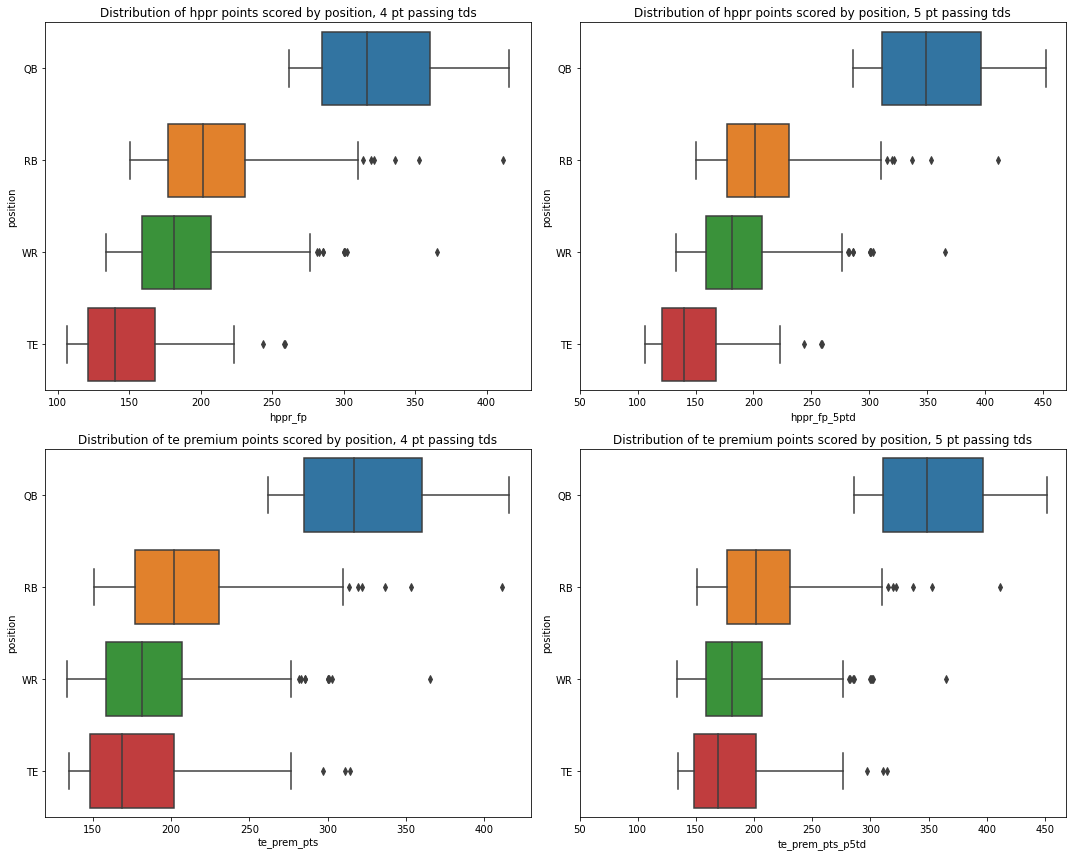

In [158]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = starter_df, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = starter_df, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = starter_df, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = starter_df, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

<AxesSubplot:xlabel='team_wins', ylabel='te_prem_pts_p5td'>

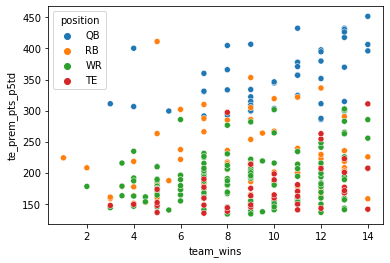

In [159]:
sns.scatterplot(data = starter_df, x = 'team_wins', y = 'te_prem_pts_p5td', hue = 'position')

<AxesSubplot:xlabel='team_wins', ylabel='te_prem_pts_p5td'>

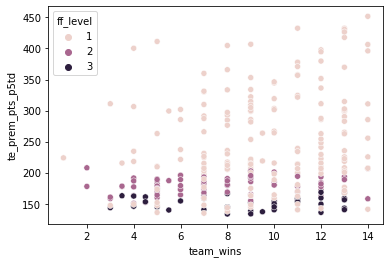

In [95]:
sns.scatterplot(data = starter_df, x = 'team_wins', y = 'te_prem_pts_p5td', hue = 'ff_level')

<AxesSubplot:xlabel='age', ylabel='te_prem_pts_p5td'>

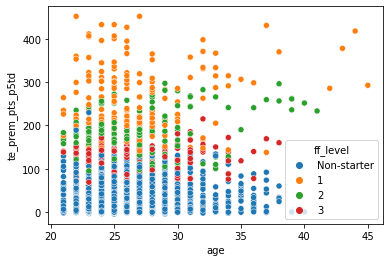

In [160]:
sns.scatterplot(data = ff_collective_sm, x = 'age', y = 'te_prem_pts_p5td', hue = 'ff_level')

TEs floors definitely increase, as do QBs wtih 5 pt passing tds; qbs go into almost a league of their own. similar to QBs in real nfl

In [163]:
ff_collective_sm['pos'] = ff_collective_sm['pos'].fillna(ff_collective_sm['position'])

In [166]:
ff_collective_sm['season'].value_counts()

### Seperating by position

# creating separate ff

ff_rb_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'RB']
ff_wr_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'WR']
ff_qb_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'QB']
ff_te_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_t = ff_rb_t.dropna(how = 'all', axis = 1)
ff_qb_t = ff_qb_t.dropna(how = 'all', axis = 1)
ff_wr_t = ff_wr_t.dropna(how = 'all', axis = 1)
ff_te_t = ff_te_t.dropna(how = 'all', axis = 1)

ff_rb_t.describe()

,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,season,cmp,ppr,dkpt,fdpt,vbd,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank
count,813.000000,861.000000,782.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,612.000000,648.000000,648.000000,648.000000,235.000000,926.000000,157.000000,148.000000,148.000000,148.000000,23.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,745.000000,194.000000,441.000000,441.000000,441.000000,630.000000,630.000000,630.000000,630.000000,630.000000,648.000000,596.000000,566.000000,577.000000,648.00000,648.000000,648.000000,648.000000,624.000000,624.000000,625.000000,612.000000,612.000000,926.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.00000,648.000000,648.000000,648.000000,647.000000
mean,71.012300,215.819977,2.815857,25.501543,11.288580,3.788580,20.774691,15.998457,0.220679,0.004630,0.040123,296.368827,2.191358,68.540123,120.972222,0.626543,65.991634,0.006173,0.745370,0.418210,77.468085,2020.614471,0.025478,78.826351,82.231757,70.491892,52.913043,4.473698,22.708762,2.787491,97.294735,3.982169,0.098263,0.382179,381.865747,337.675031,5729.831870,3787.946048,1941.885822,21.713927,71.297695,-68.319668,381.353234,5717.230514,3827.580431,1889.650083,21.946932,0.793765,8.067993,0.069652,8.182421,8.218792,16.943299,0.680272,1.072562,1.752834,3795.157143,1927.946032,5723.103175,385.352381,2021.179365,0.293166,3.883760,7.356423,5.624542,84.53858,89.354938,0.424383,7.168000,4.496221,0.033573,inf,-inf,5.215214,0.168467,417.341049,2.817901,57.820093,57.824722,65.819321,65.823951,65.83321,65.837840,5.215132,5.216177,81.137558
std,1.907942,17.156160,2.661309,2.699819,4.967753,5.084151,23.407984,18.407167,2.442996,0.067936,0.275077,366.611471,3.302912,80.633187,146.248848,1.176551,73.621782,0.078385,1.185295,0.789875,57.913969,1.262073,0.194443,86.172836,88.648603,78.103467,41.700134,2.466471,13.680034,0.187011,42.668843,17.492745,0.985750,0.092775,70.058183,34.425523,555.390835,546.641556,386.276967,5.396208,89.132069,78.225069,59.185554,539.925802,436.986967,294.622646,5.556162,27.287521,3.245291,0.254771,3.298025,3.201318,0.231869,1.065917,1.412347,1.836535,534.747441,391.289678,554.743588,69.725624,0.983757,0.365209,1.603015,3.227054,3.016936,94.33171,98.473373,0.794392,6.644188,1.755633,0.071250,NaN,NaN,5.013589,0.374482,473.759347,3.858492,67.772164,67.784534,75.299178,75.311215,75.28980,75.301837,5.160587,5.159711,46.691560
min,66.000000,164.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,-3.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,2019.000000,0.000000,-2.000000,-1.000000,-2.000000,3.000000,2.037176,0.000000,2.208455,19.014877,-42.140389,-3.511699,0.100000,243.000000,253.000000,4368.000000,2219.000000,1156.

In [167]:
### Seperating by position

# creating separate ff

ff_rb_starter = starter_df.loc[starter_df['position'] == 'RB']
ff_wr_starter = starter_df.loc[starter_df['position'] == 'WR']
ff_qb_starter = starter_df.loc[starter_df['position'] == 'QB']
ff_te_starter = starter_df.loc[starter_df['position'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_starter = ff_rb_starter.dropna(how = 'all', axis = 1)
ff_qb_starter = ff_qb_starter.dropna(how = 'all', axis = 1)
ff_wr_starter = ff_wr_starter.dropna(how = 'all', axis = 1)
ff_te_starter = ff_te_starter.dropna(how = 'all', axis = 1)

In [168]:
# saving these new DFs

starter_df.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv")

ff_rb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_collective.csv")
ff_wr_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_collective.csv")
ff_qb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_collective.csv")
ff_te_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_collective.csv")

In [169]:
ff_rb_t.describe()

,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,season,cmp,ppr,dkpt,fdpt,vbd,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank
count,813.000000,861.000000,782.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,612.000000,648.000000,648.000000,648.000000,235.000000,926.000000,157.000000,148.000000,148.000000,148.000000,23.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,745.000000,194.000000,441.000000,441.000000,441.000000,630.000000,630.000000,630.000000,630.000000,630.000000,648.000000,596.000000,566.000000,577.000000,648.00000,648.000000,648.000000,648.000000,624.000000,624.000000,625.000000,612.000000,612.000000,926.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.00000,648.000000,648.000000,648.000000,647.000000
mean,71.012300,215.819977,2.815857,25.501543,11.288580,3.788580,20.774691,15.998457,0.220679,0.004630,0.040123,296.368827,2.191358,68.540123,120.972222,0.626543,65.991634,0.006173,0.745370,0.418210,77.468085,2020.614471,0.025478,78.826351,82.231757,70.491892,52.913043,4.473698,22.708762,2.787491,97.294735,3.982169,0.098263,0.382179,381.865747,337.675031,5729.831870,3787.946048,1941.885822,21.713927,71.297695,-68.319668,381.353234,5717.230514,3827.580431,1889.650083,21.946932,0.793765,8.067993,0.069652,8.182421,8.218792,16.943299,0.680272,1.072562,1.752834,3795.157143,1927.946032,5723.103175,385.352381,2021.179365,0.293166,3.883760,7.356423,5.624542,84.53858,89.354938,0.424383,7.168000,4.496221,0.033573,inf,-inf,5.215214,0.168467,417.341049,2.817901,57.820093,57.824722,65.819321,65.823951,65.83321,65.837840,5.215132,5.216177,81.137558
std,1.907942,17.156160,2.661309,2.699819,4.967753,5.084151,23.407984,18.407167,2.442996,0.067936,0.275077,366.611471,3.302912,80.633187,146.248848,1.176551,73.621782,0.078385,1.185295,0.789875,57.913969,1.262073,0.194443,86.172836,88.648603,78.103467,41.700134,2.466471,13.680034,0.187011,42.668843,17.492745,0.985750,0.092775,70.058183,34.425523,555.390835,546.641556,386.276967,5.396208,89.132069,78.225069,59.185554,539.925802,436.986967,294.622646,5.556162,27.287521,3.245291,0.254771,3.298025,3.201318,0.231869,1.065917,1.412347,1.836535,534.747441,391.289678,554.743588,69.725624,0.983757,0.365209,1.603015,3.227054,3.016936,94.33171,98.473373,0.794392,6.644188,1.755633,0.071250,NaN,NaN,5.013589,0.374482,473.759347,3.858492,67.772164,67.784534,75.299178,75.311215,75.28980,75.301837,5.160587,5.159711,46.691560
min,66.000000,164.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,-3.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,2019.000000,0.000000,-2.000000,-1.000000,-2.000000,3.000000,2.037176,0.000000,2.208455,19.014877,-42.140389,-3.511699,0.100000,243.000000,253.000000,4368.000000,2219.000000,1156.

# Further dataset transformation

In [170]:
# let's aggregate and pivot each position 
# these will end up being

ff_rb_agg = ff_rb_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_wr_agg = ff_wr_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_qb_agg = ff_qb_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_te_agg = ff_te_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()

ff_rb_agg.head()

,player_name,season,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,cmp,ppr,dkpt,fdpt,vbd,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank
0,A.J. Dillon,2020,72.0,250.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,2.878952,14.285714,2.611524,100.000554,23.999446,1.142831,0.523810,509.0,358.0,6224.0,4106.0,2118.0,11.0,259.61,-92.33,369.0,5344.0,3539.0,1805.0,18.0,-21.29,3.0,0.0,13.0,13.0,NaN,0.0,0.0,0.0,3733.0,1795.0,5528.0,376.0,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A.J. Dillon,2021,72.0,250.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,3.493876,22.324643,2.566363,130.675085,9.524915,0.331090,0.496380,450.0,375.0,6215.0,4315.0,1900.0,13.0,185.17,-67.13,371.0,5579.0,3724.0,1855.0,26.0,-37.23,4.0,0.0,13.0,13.0,NaN,0.0,0.0,0.0,4106.0,2118.0,6224.0,509.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A.J. Dillon,2022,72.0,250.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,3.906207,17.743840,2.594608,106.369996,-1.062304,-0.129167,0.447654,370.0,334.0,5745.0,3632.0,2113.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.0,0.0,0.0,4315.0,1900.0,6215.0,450.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A.J. Dillon,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3632.0,2113.0,5745.0,370.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A.J. Ouellette,2019,NaN,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.0,305.0,5455.0,3554.0,1901.0,28.0,13.54,-88.15,393.0,5785.0,3470.0,2315.0,20.0,21.92,10.0,0.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
ff_rb_agg.describe()

,season,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,cmp,ppr,dkpt,fdpt,vbd,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,team_games,games_out,games_questionable,games_out_or_questionable,passy_last_yr_tm_stat,rushy_last_yr_tm_stat,totyd_last_yr_tm_stat,pts_scored_last_yr_tm_stat,next_season,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank
count,923.000000,811.000000,859.000000,781.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,609.000000,645.000000,645.000000,645.000000,234.000000,156.000000,147.000000,147.000000,147.000000,22.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,743.000000,194.000000,441.000000,441.000000,441.000000,629.000000,629.000000,629.000000,629.000000,629.000000,645.000000,593.000000,563.000000,574.000000,645.000000,645.000000,645.000000,645.000000,621.000000,621.000000,622.000000,609.000000,609.000000,923.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,2020.615385,71.014797,215.891735,2.813060,25.494574,11.288372,3.789147,20.691473,15.934884,0.221705,0.004651,0.040310,295.874419,2.187597,68.437209,120.466667,0.627907,65.836256,0.006202,0.747287,0.420155,77.128205,0.025641,77.985034,81.372789,69.685714,53.818182,4.473698,22.708762,2.787491,97.294735,3.982169,0.098263,0.382179,381.917085,337.684673,5730.032663,3787.847990,1942.184673,21.706030,71.374950,-68.229377,381.254153,5716.999169,3827.661130,1889.338040,21.952658,0.816503,8.060631,0.069767,8.190199,8.224092,16.943299,0.680272,1.072562,1.752834,3795.187599,1927.821145,5723.008744,385.345787,2021.181240,0.293392,3.884534,7.355816,5.623313,84.372093,89.168992,0.426357,7.154952,4.492846,0.033626,inf,-inf,5.202945,0.169014,416.341085,2.815504,57.701891,57.706543,65.669333,65.673984,65.683287,65.687938,5.203303,5.204353,81.131783
std,1.262019,1.904453,17.097790,2.659937,2.693226,4.975462,5.083667,23.409519,18.415632,2.448633,0.068093,0.275703,366.046935,3.297444,80.529987,146.224284,1.178678,73.638909,0.078566,1.187282,0.791196,57.802763,0.195059,85.855372,88.331504,77.750152,42.449563,2.466471,13.680034,0.187011,42.668843,17.492745,0.985750,0.092775,70.065239,34.431481,555.430550,546.914095,386.316203,5.392892,89.168156,78.020062,59.111532,538.237294,436.567897,293.975166,5.558328,27.179461,3.239738,0.254967,3.292070,3.198180,0.231869,1.065917,1.412347,1.836535,535.171718,391.226031,554.896255,69.597890,0.983412,0.365282,1.606231,3.234486,3.024203,94.284612,98.436793,0.795710,6.645479,1.758971,0.071409,NaN,NaN,5.016296,0.374968,473.699581,3.857526,67.756611,67.769049,75.306111,75.318212,75.296718,75.308819,5.163904,5.163026,46.736987
min,2019.000000,66.000000,164.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,-3.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.000000,-1.000000,-2.000000,3.000000,2.037176,0.000000,2.208455,19.014877,-42.140389,-3.511699,0.100000,243.000000,253.000000,4368.000000,2219.000000

In [172]:
# creating pivot table using 'player_name' as the index, 'season' as the columns, 
# and aggregate the stats 
# Create a dictionary of dataframes
dataframes = {
    'ff_rb_agg': ff_rb_agg,
    'ff_wr_agg': ff_wr_agg,
    'ff_qb_agg': ff_qb_agg,
    'ff_te_agg': ff_te_agg
}

# Create empty dictionaries to store the wide dataframes
rb_wide = {}
wr_wide = {}
qb_wide = {}
te_wide = {}

# Iterate over the dataframes dictionary
for name, df in dataframes.items():
    # Pivot the dataframe
    wide_df = pd.pivot_table(df, index='player_name', columns='season', aggfunc='sum')
    
    # Reset the column index to remove the multi-level column hierarchy
    wide_df.columns = [f'{col[0]}_{col[1]}' for col in wide_df.columns]
    
    # Save the wide dataframe to the corresponding variable
    if name == 'ff_rb_agg':
        rb_wide = wide_df
    elif name == 'ff_wr_agg':
        wr_wide = wide_df
    elif name == 'ff_qb_agg':
        qb_wide = wide_df
    elif name == 'ff_te_agg':
        te_wide = wide_df




rb_wide.head()


,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_los_2019,avg_time_to_los_2020,avg_time_to_los_2021,avg_time_to_los_2022,avg_time_to_los_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,efficiency_2019,efficiency_2020,efficiency_2021,efficiency_2022,efficiency_2023,expected_rush_yards_2019,expected_rush_yards_2020,expected_rush_yards_2021,expected_rush_yards_2022,expected_rush_yards_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_2022,offense_2023,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingatt_2023,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingtd_2023,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passingyds_2023,passy_2019,passy_2020,passy_2021,passy_2022,passy_2023,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passy_last_yr_tm_stat_2023,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,passyds_allowed_2023,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,pct_gs_2023,percent_attempts_gte_eight_defenders_2019,percent_attempts_gte_eight_defenders_2020,percent_attempts_gte_eight_defenders_2021,percent_attempts_gte_eight_defenders_2022,percent_attempts_gte_eight_defenders_2023,ppr_2019,ppr_2020,ppr_2021,ppr_2022,ppr_2023,pts_allowed_2019,pts_allowed_2020,pts_allowed_2021,pts_allowed_2022,pts_allowed_2023,pts_scored_2019,pts_scored_2020,pts_scored_2021,pts_scored_2022,pts_scored_2023,pts_scored_last_yr_tm_stat_2019,pts_scored_last_yr_tm_stat_2020,pts_scored_last_yr_tm_stat_2021,pts_scored_last_yr_tm_stat_2022,pts_scored_last_yr_tm_stat_2023,rec_2019,rec_2020,rec_2021,rec_2022,rec_2023,receivingtd_2019,receivingtd_2020,receivingtd_2021,receivingtd_2022,receivingtd_2023,receivingyds_2019,receivingyds_2020,receivingyds_2021,receivingyds_2022,receivingyds_2023,rookie_2019,rookie_2020,rookie_2021,rookie_2022,rookie_2023,rush_pct_over_expected_2019,rush_pct_over_expected_2020,rush_pct_over_expected_2021,rush_pct_over_expected_2022,rush_pct_ove

In [173]:
print('QB Wide Dimensions: ', qb_wide.shape,
      'RB Wide Dimensions: ', rb_wide.shape,
      'WR Wide dimensions: ', wr_wide.shape, 
      'TE Wide Dimensions: ', te_wide.shape)

QB Wide Dimensions:  (178, 520) RB Wide Dimensions:  (392, 425) WR Wide dimensions:  (619, 505) TE Wide Dimensions:  (332, 480)


In [174]:
qb_wide.describe()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_20

In [175]:
# filling 0s in age

ages = ['age_2019', 'age_2020', 'age_2021', 'age_2022']
dfs = [qb_wide, rb_wide, wr_wide, te_wide]

for i in dfs:
    i[ages] = i[ages].replace(0, np.nan)
    
    # filling in upwards
    i['age_2020'] = i['age_2020'].fillna(i['age_2019'].add(1))
    i['age_2021'] = i['age_2021'].fillna(i['age_2020'].add(1))
    i['age_2022'] = i['age_2022'].fillna(i['age_2021'].add(1))
    

    # filling downwards
    i['age_2021'] = i['age_2021'].fillna(i['age_2022'].sub(1))
    i['age_2020'] = i['age_2020'].fillna(i['age_2021'].sub(1))
    i['age_2019'] = i['age_2019'].fillna(i['age_2020'].sub(1))
    
    # creating column for 2023 age
    i['age_2023'] = i['age_2022'] + 1


In [176]:
# filling 0s in adp with null

adps = ['adp_2019', 'adp_2020', 'adp_2021', 'adp_2022']

for i in dfs:
    i[adps] = i[adps].replace(0, np.nan)


In [177]:
qb_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv")
rb_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv")
wr_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv")
te_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv")

## Filtering Data

Text(0.5, 1.0, 'Distribution of games started')

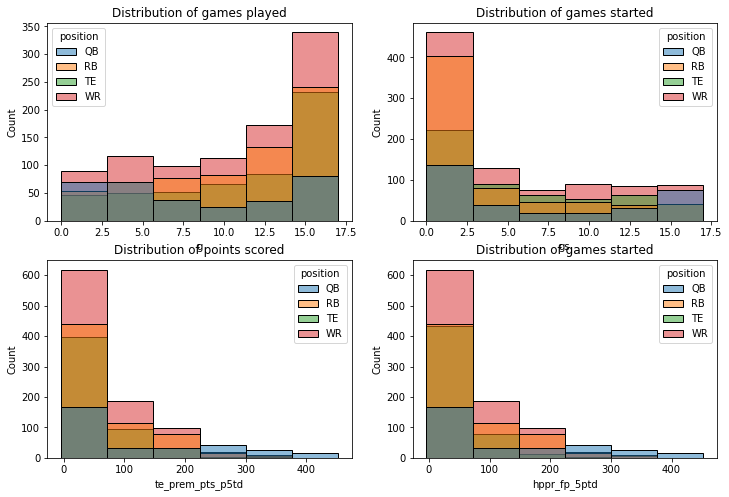

In [178]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

sns.histplot(data = ff_collective_sm, x = 'g', ax = axes[0, 0], hue = 'position', bins = 6)
axes[0, 0].set_title('Distribution of games played')

sns.histplot(data = ff_collective_sm, x = 'gs', ax = axes[0, 1], hue = 'position', bins  = 6)
axes[0, 1].set_title('Distribution of games started')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 0], hue = 'position', bins  = 6)
axes[1, 0].set_title('Distribution of points scored')

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[1, 1], hue = 'position', bins  = 6)
axes[1, 1].set_title('Distribution of games started')


In [179]:
print('Percentiles by season: \n', ff_collective_sm.groupby('season')['te_prem_pts_p5td'].quantile([.1, .2, .3, .4, .5, .55, .6]),
      '\n\n Overall Percentiles:\n', ff_collective_sm['te_prem_pts_p5td'].quantile([.1, .2, .3, .4, .5, .55, .6]))

Percentiles by season: 
 season      
2019    0.10     0.000
        0.20     3.020
        0.30     8.000
        0.40    18.988
        0.50    33.100
        0.55    41.575
        0.60    53.960
2020    0.10     1.200
        0.20     4.600
        0.30    10.660
        0.40    20.564
        0.50    33.500
        0.55    44.760
        0.60    59.060
2021    0.10     0.000
        0.20     2.800
        0.30     7.706
        0.40    16.600
        0.50    33.050
        0.55    43.470
        0.60    53.316
2022    0.10     0.000
        0.20     3.540
        0.30     8.900
        0.40    19.164
        0.50    33.050
        0.55    41.655
        0.60    52.740
2023    0.10       NaN
        0.20       NaN
        0.30       NaN
        0.40       NaN
        0.50       NaN
        0.55       NaN
        0.60       NaN
Name: te_prem_pts_p5td, dtype: float64 

 Overall Percentiles:
 0.10     0.00
0.20     3.30
0.30     8.72
0.40    19.00
0.50    33.40
0.55    43.07
0.60    5

In [180]:
print('Percentiles of games played by season: \n', ff_collective_sm.groupby('season')['g'].quantile([.1, .2, .25, .3, .35, .4]),
      '\n Percentiles of games played overall: \n', ff_collective_sm['g'].quantile([.1, .2, .25, .3, .35, .4]))

Percentiles of games played by season: 
 season      
2019    0.10     2.0
        0.20     5.0
        0.25     6.0
        0.30     7.0
        0.35     9.0
        0.40    10.0
2020    0.10     2.0
        0.20     5.0
        0.25     6.0
        0.30     8.0
        0.35     9.0
        0.40    10.0
2021    0.10     2.0
        0.20     5.0
        0.25     6.0
        0.30     7.0
        0.35     9.0
        0.40    10.0
2022    0.10     2.0
        0.20     5.0
        0.25     6.0
        0.30     8.0
        0.35     9.0
        0.40    10.0
2023    0.10     NaN
        0.20     NaN
        0.25     NaN
        0.30     NaN
        0.35     NaN
        0.40     NaN
Name: g, dtype: float64 
 Percentiles of games played overall: 
 0.10     2.0
0.20     5.0
0.25     6.0
0.30     8.0
0.35     9.0
0.40    10.0
Name: g, dtype: float64


For a cut off, to try to take the players that have an impact on fantasy and play at least a decent amount of games, the median for points (33.4) and 25th percentile for games played (6). These stay pretty consistent as the median for each season, as well.

In [181]:
## Filtering data 

## first, getting rid of those null columns of players without stats for a given year

ff_collective_sm = ff_collective_sm.dropna(subset = ['tm', 'g', 'gs'])

## setting a filter for g 

ff_collective_sm = ff_collective_sm.loc[ff_collective['g'] >= 6]


# filtering for top 50% of fantasy points


ff_collective_sm = ff_collective_sm.loc[ff_collective_sm['te_prem_pts_p5td'] >= (ff_collective_sm['te_prem_pts_p5td'].quantile(.5))]

Text(0.5, 1.0, 'Distribution of hppr points scored')

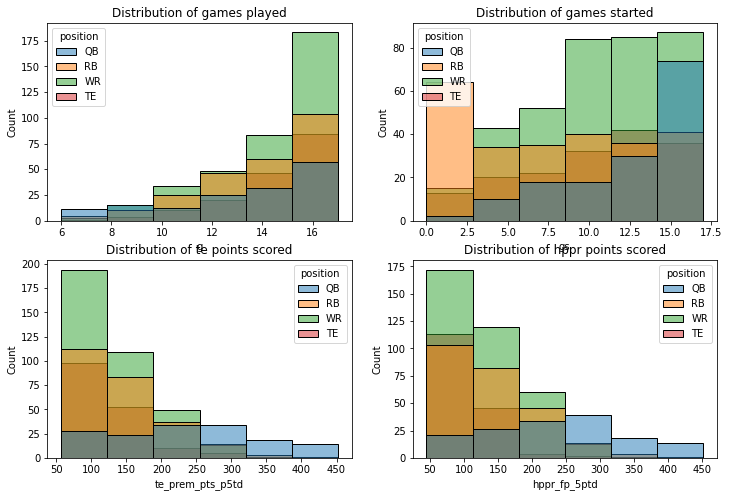

In [182]:
# let's re-visualize this data with these filters

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

sns.histplot(data = ff_collective_sm, x = 'g', ax = axes[0, 0], hue = 'position', bins = 6)
axes[0, 0].set_title('Distribution of games played')

sns.histplot(data = ff_collective_sm, x = 'gs', ax = axes[0, 1], hue = 'position', bins  = 6)
axes[0, 1].set_title('Distribution of games started')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 0], hue = 'position', bins  = 6)
axes[1, 0].set_title('Distribution of te points scored')

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[1, 1], hue = 'position', bins  = 6)
axes[1, 1].set_title('Distribution of hppr points scored')

In [183]:
ff_collective_sm.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv")